<a href="https://colab.research.google.com/github/sunkusun9/ML2022_1/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작 필요

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,299 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124016 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truety

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
from sklearn.metrics import mean_squared_error

# 다중선형회귀분석(Multiple Linear Regression)

In [3]:
import numpy as np

## 다중선형회귀분석 데이터셋 만들기

* 표준정규분포를 따르는 x_0, x_1을 200개 생성
beta_0 = 1, beta_1 = -0.1, beta_2 = 0.8 이고
노이즈의 분산을 0.4로 하여 y를 생성

$y=1-0.1x_1+0.8x_2+e, e \sim N(0, 0.4)$

In [4]:
n = 200 # 데이터 생성 수
np.random.seed(42) # 매번 동일한 난수 생성하기 위해 랜덤 Seed를 42로 지정
x_0 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
x_1 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
beta_0, beta_1, beta_2, eps = 1, -0.3, 0.8, 0.4 # eps는 오차의 분산
y = beta_0 + beta_1 * x_0 + beta_2 * x_1 + np.random.normal(scale=eps**0.5, size=n) 
np.mean(x_0), np.var(x_0), np.mean(x_1), np.var(x_1) # 각각 평균과 분산을 뽑아 확인

(-0.04077096517208498,
 0.8624344486801115,
 0.0858681868988765,
 0.9693056403571758)

x_0, x_1으로 Matrix X를 만든다.

In [5]:
X = np.vstack([x_0, x_1]).T

* 각각의 속성값과 (x_0, x_1)과 y값의 산포도 그래프를 찍는다.

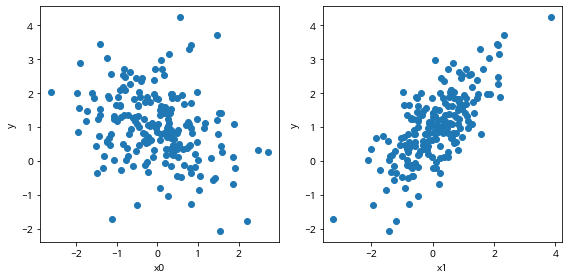

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axs):
    col_name = 'x{}'.format(i)
    ax.scatter(X[:, i], y, label=col_name)
    ax.set_xlabel(col_name)
    ax.set_ylabel("y")
plt.tight_layout()
plt.show()

# 학습

## 정규방정식

$\beta=(X^TX)^{-1}X^Ty$

In [7]:
X_1 = np.hstack([np.ones((X.shape[0], 1)), X])

In [8]:
gram_matrix = np.matmul(X_1.T, X_1)
inv_gram_matrix = np.linalg.inv(gram_matrix)
beta_hat = np.dot(inv_gram_matrix,  np.dot(X_1.T, y))
beta_hat

array([ 0.94328083, -0.38933287,  0.78723605])

## 경사하강법

$\frac{\partial F}{\partial\beta_0}=\frac{\sum\limits_{i=1}^{n}-(y_i-\beta_0-x_i^T\beta)}{n}$

$\frac{\partial F}{\partial\beta}=\frac{\sum\limits_{i=1}^{n}-x_i(y_i-\beta_0-x_i^T\beta)}{n}$

In [9]:
np.random.seed(42)
beta_hat =  np.random.rand(3) * 2 - 1 # [-1, 1) 까지 랜덤 번호 생성
beta_hat_0 = beta_hat[0]  # 절편을 따로 뗀다
beta_hat = beta_hat[1:] # 절편을 제외한 계수를 beta_hat로 다시 지정한다 
learning_rate = 0.1
epoch = 30
loss_hist = []
beta_hist = []
for j in range(epoch):
    y_delta =  y - beta_hat_0 - np.matmul(X, beta_hat)
    """
    ### Vectorized Operation을 사용하지 않는다면... 
    beta_hat_delta_0 = 0
    beta_hat_delta = np.zeros(2)
    for i in range(X.shape[0]):
        beta_hat_delta_0 += -y_delta[i]
        beta_hat_delta += -X[i] * y_delta[i]
    beta_hat_delta_0 = beta_hat_delta_0 / n
    beta_hat_delta = beta_hat_delta / n
    """
    beta_hat_delta_0 = -np.mean(y_delta)
    #beta_hat_delta = -np.mean(X * y_delta[:, np.newaxis], axis=0)
    beta_hat_delta = -np.dot(X.T, y_delta) / n # 좀 더효율적이고 간결하다
    beta_hat_0 -= learning_rate * beta_hat_delta_0
    beta_hat -= learning_rate * beta_hat_delta
    y_hat = beta_hat_0 + np.matmul(X, beta_hat)
    loss = mean_squared_error(y, y_hat) # mse
    loss_hist.append(loss)
    beta_hist.append((beta_hat_0, beta_hat))

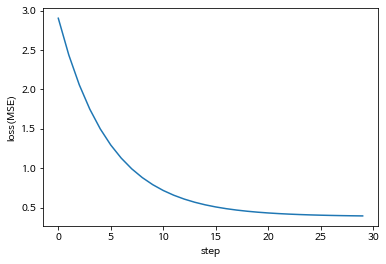

In [10]:
plt.plot(loss_hist)
plt.xlabel('step')
plt.ylabel('loss(MSE)')
plt.show()

In [11]:
beta_hat_0, beta_hat

(0.9064412026592172, array([-0.30565103,  0.76625944]))

[Question]

1. beta_0(절편)을 따로 분리하지않고 하는 방법은?

2. 왜 beta를 따로 분리했을까?

잠깐] 벡터화 연산(Vectorized Operation) 활용의 중요성

In [12]:
%%timeit

beta_hat_delta_0 = 0
beta_hat_delta = np.zeros(2)
for i in range(X.shape[0]):
    beta_hat_delta_0 += -y_delta[i]
    beta_hat_delta += -X[i] * y_delta[i]
beta_hat_delta_0 = beta_hat_delta_0 / n
beta_hat_delta = beta_hat_delta / n

1.95 ms ± 441 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
%%timeit

-np.mean(X * y_delta[:, np.newaxis], axis=0)

33.4 µs ± 5.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [14]:
%%timeit

-np.dot(X.T, y_delta) / n

The slowest run took 4.18 times longer than the fastest. This could mean that an intermediate result is being cached.
6.38 µs ± 3.74 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# 다중선형회귀분석과 정규화

$y=1-0.2x_1+0.9x_2+0.3x_3+e, e \sim N(0, 0.64)$

In [15]:
n = 200 # 데이터 생성 수
np.random.seed(42) # 매번 동일한 난수 생성하기 위해 랜덤 Seed를 42로 지정
x2_0 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
x2_1 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
x2_2 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
beta_0, beta_1, beta_2, beta_3, eps = 1, -0.2, 0.9, 0.3, 0.64 # eps는 오차의 분산
y = beta_0 + beta_1 * x2_0 + beta_2 * x2_1 + beta_3 * x2_2 + np.random.normal(scale=eps**0.5, size=n) 
np.mean(x2_0), np.var(x2_0), np.mean(x2_1), np.var(x2_1), np.mean(x2_2), np.var(x2_2) # 각각 평균과 분산을 뽑아 확인

(-0.04077096517208498,
 0.8624344486801115,
 0.0858681868988765,
 0.9693056403571758,
 -0.08565503438661713,
 0.9831788497612339)

* x_0는 평균 10, 분산 4가 되도록 변환 
* x_1은 평균 -40, 분산이 16이 되도록 변환
* x_1은 평균 12, 분산이 25이 되도록 변환

In [16]:
x2_0 = x2_0 * 2 + 10 # 표준편차 2를 곱하고 여기에 평균 10을 더한다
x2_1 = x2_1 * 4 - 40 # 표준편차 4를 곱하고 여기에 평균 -40을 더한다
x2_2 = x2_2 * 5 + 12 # 표준편차 5를 곱하고 여기에 평균 12을 더한다
np.mean(x2_0), np.var(x2_0), np.mean(x2_1), np.var(x2_1), np.mean(x2_2), np.var(x2_2) # 각각 평균과 분산을 뽑아 확인

(9.91845806965583,
 3.449737794720446,
 -39.656527252404494,
 15.508890245714811,
 11.571724828066912,
 24.579471244030852)

* 각각의 속성값과 (x_0, x_1)과 y값의 산포도 그래프를 찍는다.

In [17]:
X2 = np.vstack([x2_0, x2_1, x2_2]).T

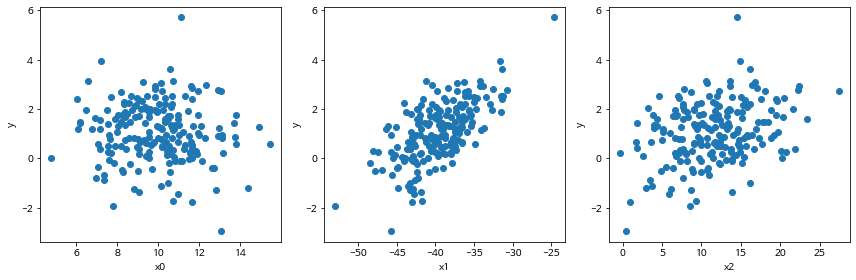

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, ax in enumerate(axs):
    col_name = 'x{}'.format(i)
    ax.scatter(X2[:, i], y, label=col_name)
    ax.set_xlabel(col_name)
    ax.set_ylabel("y")
plt.tight_layout()
plt.show()

## 정규방정식으로 학습

In [19]:
X2_1 = np.hstack([np.ones((X2.shape[0], 1)), X2]) # 절편을 구하기 위해서 전부 값이 1인 열을 추가

In [20]:
beta_hat = np.dot(np.linalg.inv(np.matmul(X2_1.T, X2_1)),  np.dot(X2_1.T, y))

In [21]:
[(i, j ) for i,j in zip([beta_0, beta_1, beta_2, beta_3], beta_hat)], mean_squared_error(y, np.dot(X2_1, beta_hat))

([(1, 8.80347166307444),
  (-0.2, -0.0601795922692232),
  (0.9, 0.2030377874265124),
  (0.3, 0.0788216995362907)],
 0.6428587489550194)

표준화가 되어 있지 않는다면 계수를 가지고 중요성, 상대적으로 분산이 큰 속성은 계수의 크기 작다.

## 경사하강법으로 학습

In [22]:
# 경사하강법을 함수화
def gradient_descent(X, y, learning_rate, epoch, random_state=9):
    if random_state is not None:
        np.random.seed(random_state)
    beta_hat =  np.random.rand(X.shape[1] + 1) * 2 - 1 # [-1, 1) 까지 랜덤 번호 생성
    beta_hat_0 = beta_hat[0]
    beta_hat = beta_hat[1:]
    loss_hist = []
    beta_hist = []
    for j in range(epoch):
        y_delta =  y - beta_hat_0 - np.matmul(X, beta_hat)
        beta_hat_delta_0 = -np.mean(y_delta)
        beta_hat_delta = -np.dot(X.T, y_delta) / n # 좀 더효율적이고 간결하다
        beta_hat_0 -= learning_rate * beta_hat_delta_0
        beta_hat -= learning_rate * beta_hat_delta
        y_hat = beta_hat_0 + np.matmul(X, beta_hat)
        loss = mean_squared_error(y, y_hat) # mse
        loss_hist.append(loss)
        beta_hist.append((beta_hat_0, beta_hat))
    return beta_hat_0, beta_hat, loss_hist, beta_hist
beta_hat_0, beta_hat,loss_hist, beta_hist = gradient_descent(X2, y, 0.001, 100)

In [23]:
(beta_0, beta_hat_0), [(i, j ) for i,j in zip([beta_1, beta_2, beta_3], beta_hat)], mean_squared_error(y, np.dot(X2, beta_hat) + beta_hat_0)

((1, -0.9680981578315895),
 [(-0.2, 0.06335524287309413),
  (0.9, -0.02108052872627008),
  (0.3, 0.043267782556658176)],
 1.472632825333718)

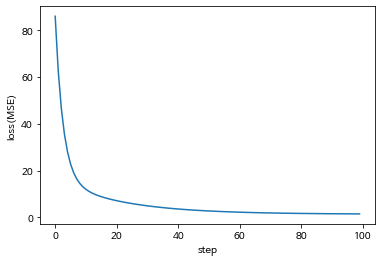

In [24]:
plt.plot(loss_hist)
plt.xlabel('step')
plt.ylabel('loss(MSE)')
plt.show()

* scipy에 있는 최적화 알고리즘을 사용해본다.

> [scipy.optimize,minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) 로 선형회귀모델을 학습한다. (method='Newton-CG')

In [25]:
from scipy.optimize import minimize

def mse(beta_hat, X, y):
    r = y - np.dot(X, beta_hat)
    return np.dot(r, r)
def jac(beta_hat, X, y):
    y_delta =  y - np.dot(X, beta_hat)
    return -np.dot(X.T, y_delta) / X.shape[0]
result = minimize(mse, np.random.rand(X2_1.shape[1]), jac=jac, args=(X2_1, y), method='Newton-CG')
result

     fun: 128.5717497910178
     jac: array([ 1.15809925e-05,  1.15680095e-04, -4.65324999e-04,  1.15230377e-04])
 message: 'Optimization terminated successfully.'
    nfev: 6
    nhev: 0
     nit: 5
    njev: 25
  status: 0
 success: True
       x: array([ 8.80347489, -0.06017968,  0.20303784,  0.07882169])

In [26]:
beta_hat = result.x
[(i, j ) for i,j in zip([beta_0, beta_1, beta_2, beta_3], beta_hat)], mean_squared_error(y, np.dot(X2_1, beta_hat))

([(1, 8.803474889821661),
  (-0.2, -0.06017968066542497),
  (0.9, 0.203037842459493),
  (0.3, 0.07882168682165092)],
 0.642858748955089)

직접만든 경사하강법보다 좋은 결과를 뽑아냈지만, 복잡한 데이터셋에서는 이 알고리즘도 정규화를 하지 않으면, 제대로 작동하지 않게 된다.  

## 정규화(Normalization)

* 표준정규분포로(Z-scaling)로 정규화를 진행해 본다.

$X\_std = \frac{(X-\bar{X})}{s}$

In [ ]:
X2_std =  (X2 - np.mean(X2, axis=0)) / np.std(X2, axis=0) # Z-scaling

In [ ]:
X2_std.shape, np.mean(X2_std), np.std(X2_std)

((200, 3), 3.1086244689504386e-17, 1.0)

[Practice]

X_std를 가지고 정규방정식을 이용하여 beta_hat을 구하시오.

In [ ]:
X2_std_1 = np.hstack([np.ones((X2_std.shape[0], 1)), X2_std])
beta_hat = np.dot(np.linalg.inv(np.matmul(X2_std_1.T, X2_std_1)),  np.dot(X2_std_1.T, y))
beta_hat0, beta_hat1, beta_hat2  = beta_hat[0], beta_hat[1], beta_hat[2]

In [ ]:
beta_1, beta_hat1, beta_2, beta_hat2

(-0.2, -0.11177438380664462, 0.9, 0.7995897779155682)

경사하강법으로 해보자.

In [ ]:
beta_hat_0, beta_hat,loss_hist, beta_hist = gradient_descent(X2_std, y, 0.1, 100)

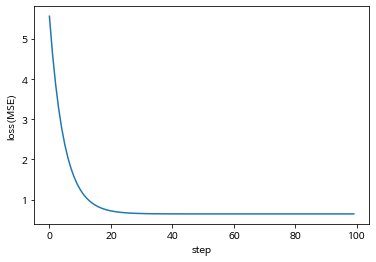

In [ ]:
plt.plot(loss_hist)
plt.xlabel('step')
plt.ylabel('loss(MSE)')
plt.show()

In [ ]:
(beta_0, beta_hat_0), [(i, j ) for i,j in zip([beta_1, beta_2, beta_3], beta_hat)], mean_squared_error(y, np.dot(X2_std, beta_hat) + beta_hat_0)

((1, 1.0668580186905179),
 [(-0.2, -0.11180052070328339),
  (0.9, 0.7995643018058106),
  (0.3, 0.3907272865967305)],
 0.6428587556659252)

[Practice]

scipy에 있는 최적화 알고리즘으로 학습해본다.

[scipy.optimize,minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) 로 선형회귀모델을 학습한다.(method='Newton-CG')

In [ ]:
from scipy.optimize import minimize

In [ ]:
def mse(beta_hat, X, y):
    r = y - np.dot(X, beta_hat)
    return np.dot(r, r)
def jac(beta_hat, X, y):
    y_delta =  y - np.dot(X, beta_hat)
    return -np.dot(X.T, y_delta) / X.shape[0]
minimize(mse, np.random.rand(X2_std_1.shape[1]), jac=jac, args=(X2_std_1, y), method='Newton-CG')

     fun: 128.5717497910039
     jac: array([ 3.07432540e-06, -1.42835243e-07,  3.18181428e-06,  2.23641944e-06])
 message: 'Optimization terminated successfully.'
    nfev: 5
    nhev: 0
     nit: 4
    njev: 13
  status: 0
 success: True
       x: array([ 1.06691236, -0.11177438,  0.79958978,  0.39077976])

[Practice]

[sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 을 사용해서 구해보자

In [ ]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression()
lr_reg.fit(X2_std, y)
lr_reg.intercept_, lr_reg.coef_, mean_squared_error(y, lr_reg.predict(X2_std))

(1.0669123676703023,
 array([-0.11177438,  0.79958978,  0.39077976]),
 0.6428587489550194)

[참고]

Floating 형식을 다룰 때 유의 사항

[numpy.finfo](https://numpy.org/doc/stable/reference/generated/numpy.finfo.html)

In [ ]:
fi = np.finfo(np.float64)
fi

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [ ]:
fi.nexp, fi.eps, fi.epsneg

(11, 2.220446049250313e-16, 1.1102230246251565e-16)

fi.nexp : 부호를 포함한 floating 포인트의 제곱 부분을 포함하는 수
fi

In [ ]:
2 ** (2 ** 10)

179769313486231590772930519078902473361797697894230657273430081157732675805500963132708477322407536021120113879871393357658789768814416622492847430639474124377767893424865485276302219601246094119453082952085005768838150682342462881473913110540827237163350510684586298239947245938479716304835356329624224137216

eps 1.0을 기준로 1.0 보다 큰 수를 구분할 수 있는 가장 작은 차이

2.220446049250313e-16 = 2 ** -52

In [ ]:
for i in range(50, 55):
    print(np.array(1.0, dtype=np.float64) + np.array(2 ** -i, dtype=np.float64) == 1.0)

False
False
False
True
True


Gradient Descent에서 속성 간의 스케일 차이가 크면 실수처리가 제대로 되지 않게 된다.

# 다중공선성

다중공선성을 위한  데이터셋을 만들어보자.

In [ ]:
n = 200 # 데이터 생성 수
np.random.seed(42) # 매번 동일한 난수 생성하기 위해 랜덤 Seed를 42로 지정
x3_0 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
x3_1 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
x3_2 = x3_0 * 0.6 + x3_1 * 0.4 + np.random.normal(scale=0.1, size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)

beta_0, beta_1, beta_2, beta_3, eps = 1, -0.2, 0.9, 0.3, 1.0 # eps는 오차의 분산
y = beta_0 + beta_1 * x3_0 + beta_2 * x3_1 + beta_3 * x3_2 + np.random.normal(scale=eps**0.5, size=n) 
X3 = np.vstack([x3_0, x3_1, x3_2]).T
np.cov(X3, rowvar=False)

array([[0.86676829, 0.0874307 , 0.54261391],
       [0.0874307 , 0.97417652, 0.43892805],
       [0.54261391, 0.43892805, 0.50228876]])

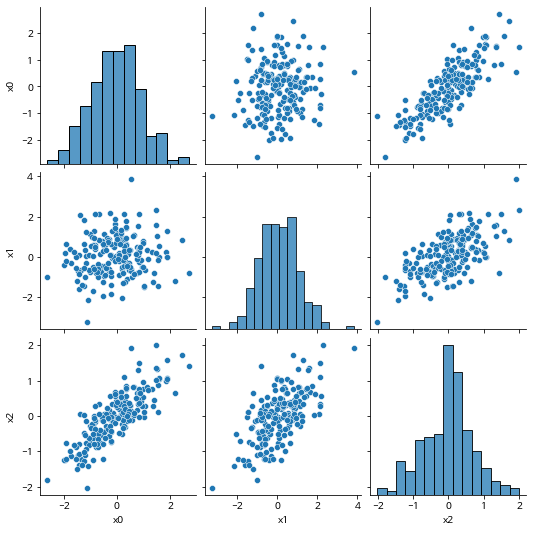

In [ ]:
sns.pairplot(pd.DataFrame(X3, columns=['x0', 'x1', 'x2']))
plt.show()

VIF를 함수로 만들어 보자.

$VIF=1/(1-R^2)$

$R^2=1-\frac{\sum\limits_{i=1}^n(y_i-\hat{y}_i)^2}{\sum\limits_{i=1}^n(y_i-\bar{y})^2}$

In [ ]:
from sklearn.linear_model import LinearRegression

$R^2$ 부터 계산해보자

In [ ]:
X_ = X3[:, [0, 1]]
y_ = X3[:, 2]
lr_reg = LinearRegression()
lr_reg.fit(X_, y_)
residual = y_ - lr_reg.predict(X_)
diff = y_ -  np.mean(y_)
R2 = 1 - np.dot(residual, residual) / np.dot(diff, diff)
R2

0.9806897649393779

[sklearn.metric.r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) 를  이용해 서 구해보자

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_, lr_reg.predict(X_))

0.9806897649393779

In [ ]:
vif = 1 / (1-r2_score(y_, lr_reg.predict(X_)))
vif

51.786008656063586

[Practice]

X와 i를 입력받아, i번재 열의 VIF 구하는 calc_vif 함수를 만들고, 

이를 활용하여, 나머지 변수 x0, x1의 VIF를 구하시오.
- 정규방정식을 이용하라.
- sklearn과 굳이 종속성을 만들지 않기위해 numpy 만을 이용하여 구현하라


In [ ]:
def calc_vif(X, i):
    """
    VIF를 계산한다.
    Parameters
    -----------
    X: design matrix
    i: 열 인덱스
    returns
    VIF
    """
    csel = [j != i for j in range(X.shape[1])]
    X_add_1 = np.hstack([np.ones((X.shape[0], 1)), X[:, csel]])
    y = X[:, i]
    gram_mat = np.matmul(X_add_1.T, X_add_1)
    inv_gram_mat = np.linalg.inv(gram_mat)
    beta_hat = np.dot(inv_gram_mat, np.dot(X_add_1.T, y))
    y_hat  = np.dot(X_add_1, beta_hat)
    residual = y - y_hat
    diff = y -  np.mean(y)
    R2 = 1 - np.dot(residual, residual) / np.dot(diff, diff)
    return 1 / (1 - R2)
calc_vif(X3, 2)

51.786008656063586

In [ ]:
for i in  [0, 1]:
    print("VIF of {}: {}".format(i, calc_vif(X3, i)))

VIF of 0: 31.68326708066757
VIF of 1: 16.917413095819736


다중공선성의 정도를 지정하여 데이터셋을 만들자.

In [ ]:
def gen_conlinear_sample(n, degree):
    """
    다중공선성 데이터셋을 만든다.
    Parameters
        n: int 데이터수
        degree: 정도(낮을 수록 정도가 세다.)
    Returns
        X, y
    """

    np.random.seed(42) # 매번 동일한 난수 생성하기 위해 랜덤 Seed를 42로 지정
    x_con_0 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
    x_con_1 = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
    if degree > 0:
        x_con_2 = x_con_0 * 0.6 + x_con_1 * 0.4 + np.random.normal(scale=degree, size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)
    else:
        x_con_2 = x_con_0 * 0.6 + x_con_1 * 0.4 # 표준정규분포(평균=0, 분산=1인 정규분포)
    beta_0, beta_1, beta_2, beta_3, eps = 1, -0.2, 0.9, 0.3, 1.0 # eps는 오차의 분산
    y = beta_0 + beta_1 * x_con_0 + beta_2 * x_con_1 + beta_3 * x_con_2 + np.random.normal(scale=eps**0.5, size=n) 
    X_con = np.vstack([x_con_0, x_con_1, x_con_2]).T
    return X_con, y

* 다중공선성이 클수록 학습결과가 불안정하다.

> 다중공선성의 정도를 점점 크게 하면서, 샘플의 미세한 변경에 따라서 산출되는 $\hat{\beta}$의 편차가 어떻게 달라지는지 살펴보자.



In [ ]:
lr_reg = LinearRegression()
dfs = {}
for degree in [1.0, 0.2, 0.1]:
    X_e, y_e = gen_conlinear_sample(300, degree)
    vif = calc_vif(X_e, 2)
    print(vif)
    # 데이터셋 중에서, 랜덤으로 95%만 골라서 학습을 하여 beta_hat을 구하자.(절편은 생략)
    # 이를 100회 반복하고 beta_hat을 저장하고 이에 대한 히스토그램을 찍어 보자.
    beta_s = []
    for i in range(100):
        rsel = np.random.rand(X_e.shape[0]) < 0.95 # rand는 [0, 1) boolean index를 활용하여 95%만 골라내자
        X_e_, y_e_ = X_e[rsel], y_e[rsel]
        lr_reg.fit(X_e_, y_e_) # 학습
        beta_s.append(lr_reg.coef_)
    df = pd.DataFrame(np.vstack(beta_s), columns=['beta_1', 'beta_2', 'beta_3'])
    dfs['vif{:.2f}'.format(vif)] = df

1.4160308279945637
12.723466890555894
48.57786763754932


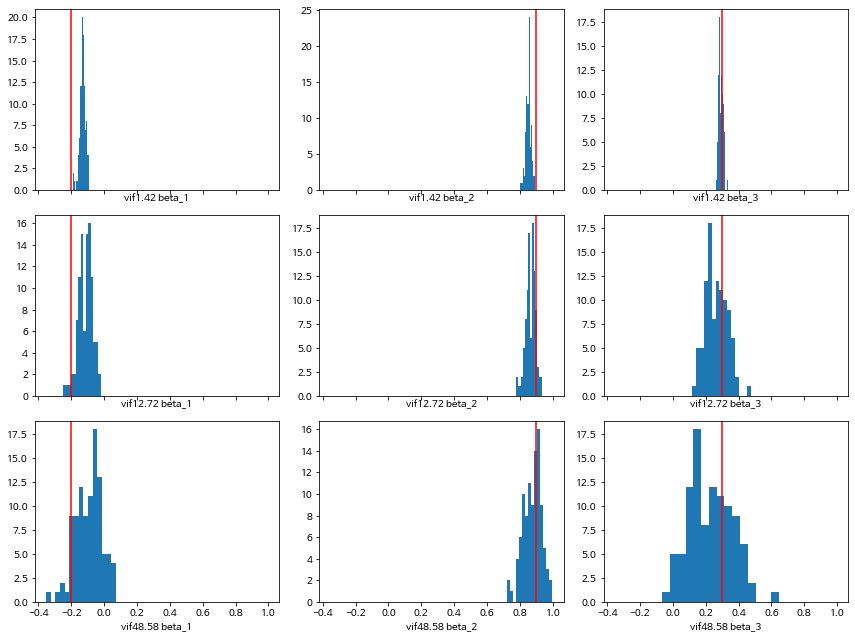

In [ ]:
beta = [-0.2, 0.9, 0.3]
fig, axs = plt.subplots(3, 3, figsize=(12, 9), sharex=True)
for i, k in zip(range(3), dfs.keys()):
    axs_ = axs[i]
    for j, ax in enumerate(axs_):
        ax.hist(dfs[k].iloc[:, j], bins=15)
        ax.axvline(beta[j], color='r')
        ax.set_xlabel("{} beta_{}".format(k, j + 1))
plt.tight_layout()
plt.show()

In [ ]:
X_e, y_e = gen_conlinear_sample(300, degree)
beta_hat_0, beta_hat,_, _ = gradient_descent(X_e, y_e, 0.1, 50, random_state=None)

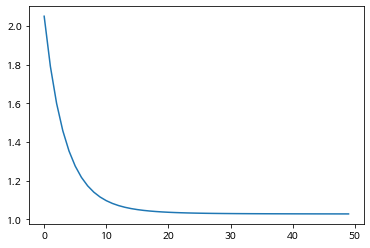

In [ ]:
plt.plot(loss_hist)
plt.show()

In [ ]:
dfs = {}
for degree in [1.0, 0.2, 0.1]:
    X_e, y_e = gen_conlinear_sample(300, degree)
    vif = calc_vif(X_e, 2)
    print(vif)
    # 데이터셋 중에서, 랜덤으로 95%만 골라서 학습을 하여 beta_hat을 구하자.(절편은 생략)
    # 이를 100회 반복하고 beta_hat을 저장하고 이에 대한 히스토그램을 찍어 보자.
    beta_s = []
    for i in range(100):
        beta_hat_0, beta_hat,_, _ = gradient_descent(X_e, y_e, 0.1, 50, random_state=None)
        beta_s.append(beta_hat)
    df = pd.DataFrame(np.vstack(beta_s), columns=['beta_1', 'beta_2', 'beta_3'])
    dfs['vif{:.2f}'.format(vif)] = df

1.4160308279945637
12.723466890555894
48.57786763754932


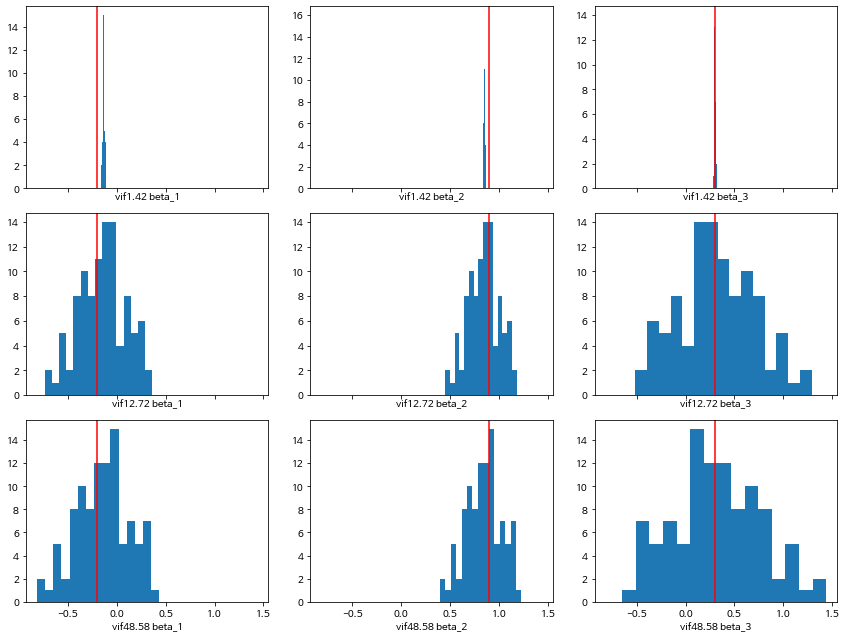

In [ ]:
beta = [-0.2, 0.9, 0.3]
fig, axs = plt.subplots(3, 3, figsize=(12, 9), sharex=True)
for i, k in zip(range(3), dfs.keys()):
    axs_ = axs[i]
    for j, ax in enumerate(axs_):
        ax.hist(dfs[k].iloc[:, j], bins=15)
        ax.axvline(beta[j], color='r')
        ax.set_xlabel("{} beta_{}".format(k, j + 1))
plt.tight_layout()
plt.show()

[Practice]
완벽히 예측이 가능하다면 어찌되는지 확인.

In [ ]:
X_e, y_e = gen_conlinear_sample(300, 0)
lr_reg = LinearRegression()
lr_reg.fit(X_e, y_e)
lr_reg.coef_

array([ 2.76237143e+13,  1.84158095e+13, -4.60395238e+13])

In [ ]:
np.linalg.inv(np.matmul(X_e.T, X_e)) # 역행렬이 존재하지 않는다.

LinAlgError: ignored

In [ ]:
beta_hat_0, beta_hat,_, _ = gradient_descent(X_e, y_e, 0.1, 100, random_state=None)
beta_hat

array([-0.64502911,  0.59565462,  0.97562944])